# Lab 2: Edge Detection and Hough Transform

## Python packages
NumPy: Used functions related to linear algebra and matrix representation. <br>
SciPy: Used for convolution <br>
Matplotlib: Used for displaying images and graphs <br>
Functions: Used to access files related to the course <br>

In [8]:
import numpy as np
from scipy.signal import convolve2d, correlate2d
import matplotlib.pyplot as plt
from Functions import *
from gaussfft import gaussfft

## Difference Operators
Create two difference operators deltax() and deltay() that approximate first order partial derivatives in two orthogonal directions.

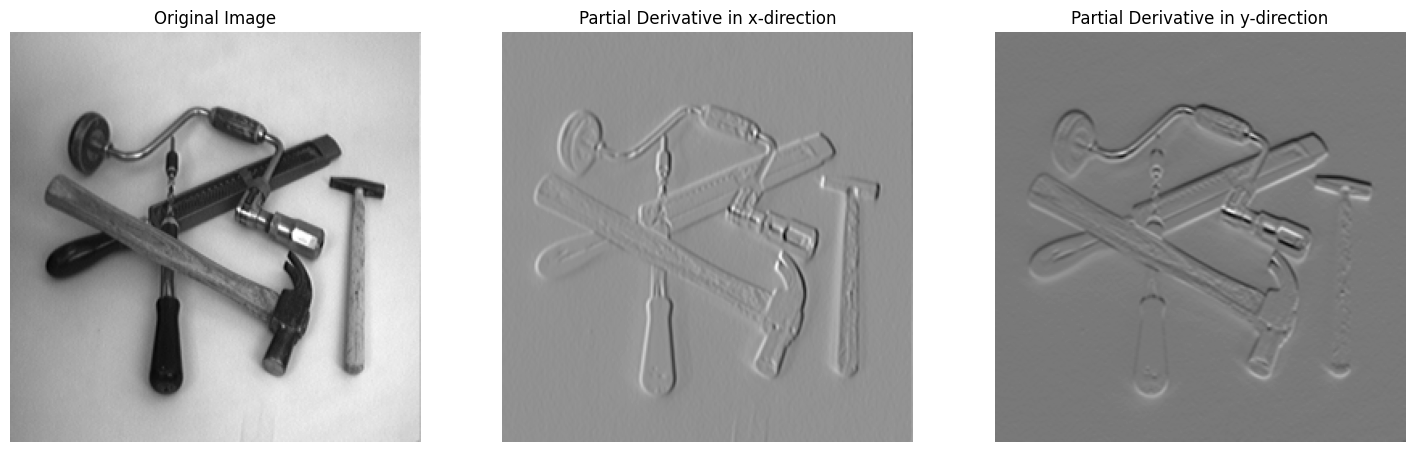

In [9]:
def deltax():
    # Sobel operator for x-direction
    return np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

def deltay():
    # Sobel operator for y-direction
    return np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

# Load the image
tools = np.load("Images-npy/few256.npy")

# Compute discrete derivatives
dxtools = convolve2d(tools, deltax(), 'valid')
dytools = convolve2d(tools, deltay(), 'valid')

# The resulting dxtools and dytools contain the gradients in x and y directions, respectively.
# Visualization using matplotlib
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(tools, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Partial derivative in x-direction
plt.subplot(1, 3, 2)
plt.imshow(dxtools, cmap='gray')
plt.title('Partial Derivative in x-direction')
plt.axis('off')

# Partial derivative in y-direction
plt.subplot(1, 3, 3)
plt.imshow(dytools, cmap='gray')
plt.title('Partial Derivative in y-direction')
plt.axis('off')

plt.show()

**Question 1** <br>
What do you expect the results to look like and why? Compare the size of dxtools with the size of tools. Why are these sizes different?

**Answer** <br>
*dxtools* allows us to see the change in intensities across the x-wise pixels in the image. *dytools* allows us to see the change in intensities across the y-wise pixels in the image. When applying the Sobel operator, the results shows the change in intensity in the image which correspond to edges.

The size of dxtools is different from the size of tools because the convolve2d function was called with the 'valid' argument. This argument causes the output to be smaller by the size of the kernel - 1 in each dimension.

## Point-wise thresholding of gradient magnitudes

(-0.5, 253.5, 253.5, -0.5)

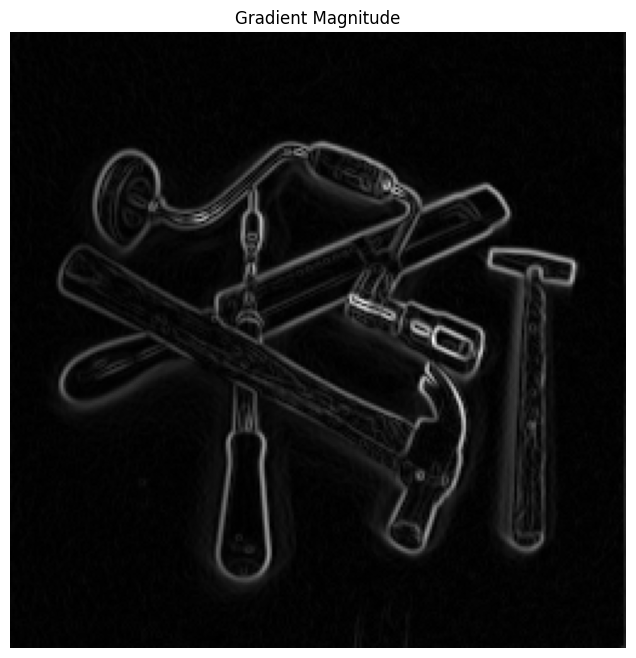

In [10]:
# Compute the gradient magnitude
gradmagntools = np.sqrt(dxtools**2 + dytools**2)

# Show the gradient magnitude image
plt.figure(figsize=(8, 8))
plt.imshow(gradmagntools, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

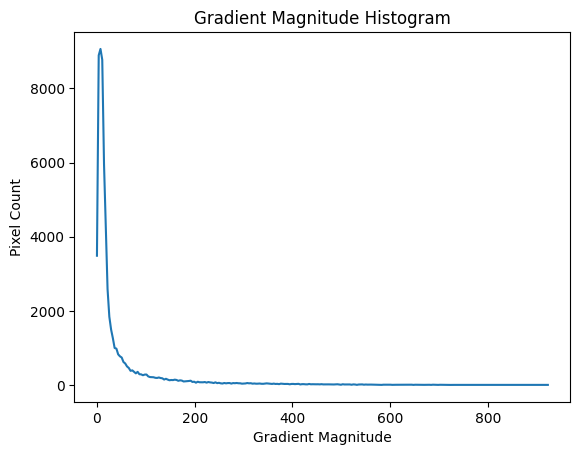

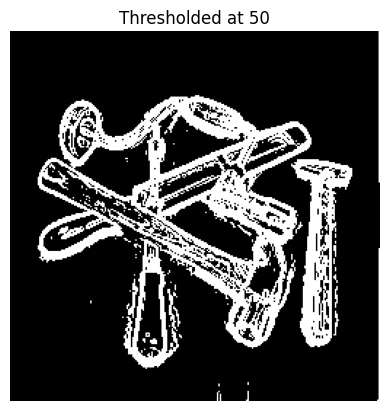

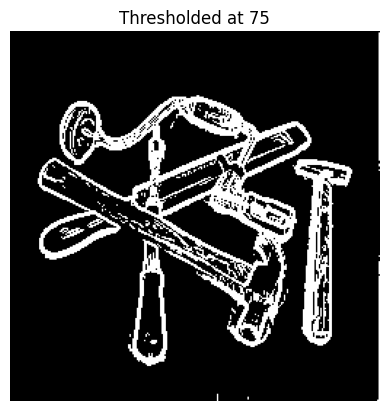

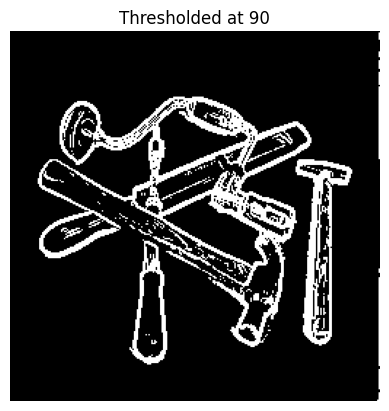

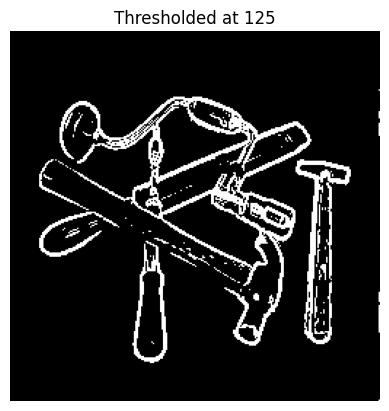

In [11]:
# Compute the histogram of the gradient magnitude image
histogramtools, bin_edges = np.histogram(gradmagntools, bins=256)

# Plot the histogram
plt.figure()
plt.title("Gradient Magnitude Histogram")
plt.xlabel("Gradient Magnitude")
plt.ylabel("Pixel Count")
plt.plot(bin_edges[0:-1], histogramtools)  # bin_edges is one element longer than histogram

# Based on the histogram, let's guess a threshold for edge detection
threshold_guesses = [50, 75, 90, 125] 

# Display thresholded images
for threshold in threshold_guesses:
    plt.figure()
    plt.imshow(gradmagntools > threshold, cmap='gray')
    plt.title(f'Thresholded at {threshold}')
    plt.axis('off')
    plt.show()

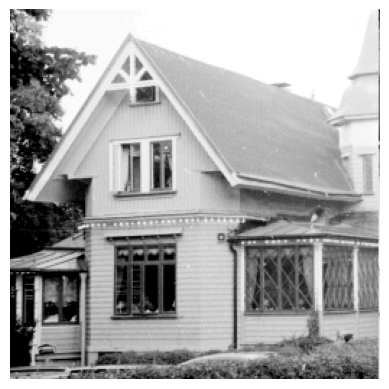

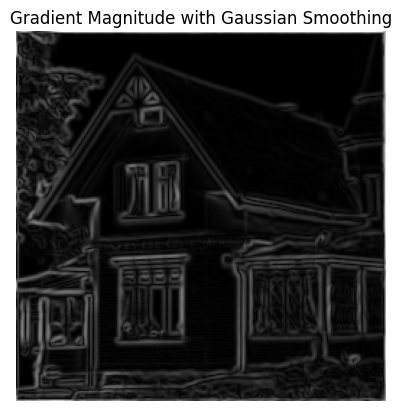

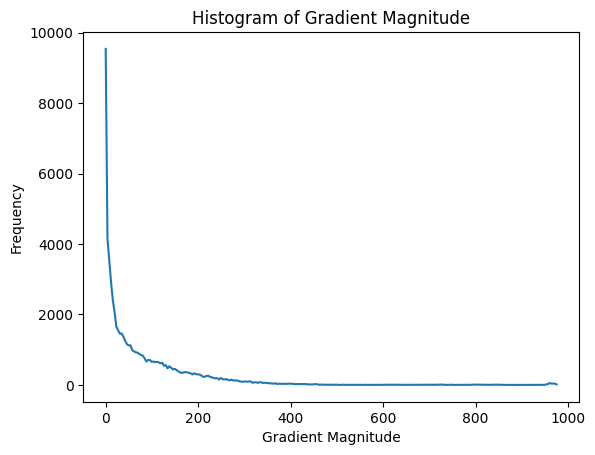

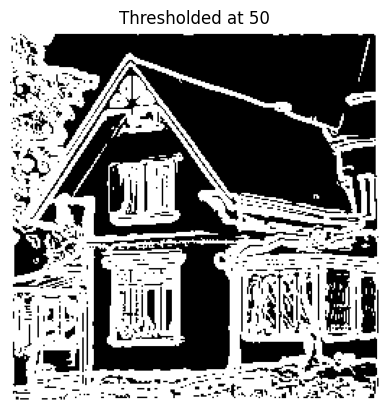

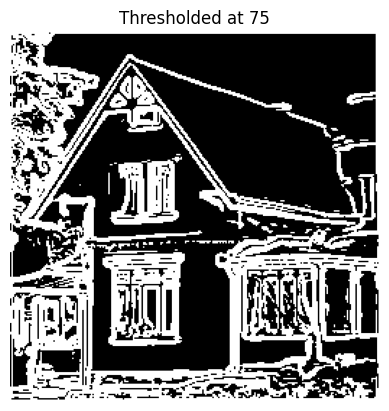

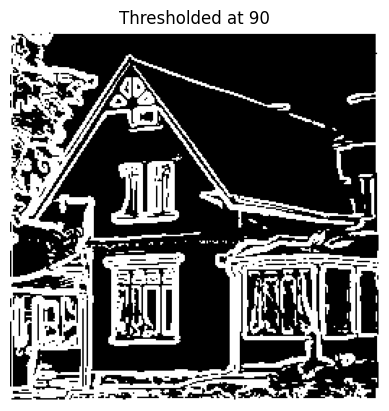

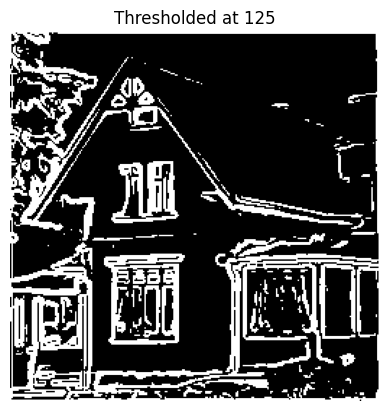

In [12]:
# Define the Sobel operators
dxmask = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

dymask = np.array([[ 1,  2,  1],
                   [ 0,  0,  0],
                   [-1, -2, -1]])

def Lv(inpic, shape = 'same'):
    inpic = np.real(gaussfft(inpic, 1))
    Lx = convolve2d(inpic, dxmask, shape)
    Ly = convolve2d(inpic, dymask, shape)
    return np.sqrt(Lx**2 + Ly**2)

# Load the image
godthem = np.load("Images-npy/godthem256.npy")  
showgrey(godthem)
gradgodthem = Lv(godthem)

# Display the gradient magnitude image
plt.imshow(gradgodthem, cmap='gray')
plt.title('Gradient Magnitude with Gaussian Smoothing')
plt.axis('off')
plt.show()

# Compute and plot the histogram of the gradient magnitude image
histogram, bin_edges = np.histogram(gradgodthem, bins=256, range=(0, gradgodthem.max()))

plt.figure()
plt.plot(bin_edges[:-1], histogram)
plt.title('Histogram of Gradient Magnitude')
plt.xlabel('Gradient Magnitude')
plt.ylabel('Frequency')
plt.show()

# Based on the histogram, let's guess a threshold for edge detection
threshold_guesses = [50, 75, 90, 125] 

# Display thresholded images
for threshold in threshold_guesses:
    plt.figure()
    plt.imshow(gradgodthem > threshold, cmap='gray')
    plt.title(f'Thresholded at {threshold}')
    plt.axis('off')
    plt.show()


**Question 2** <br>
Is it easy to find a threshold that results in thin edges? Explain why or why not!

Strong edges in the image correspond to high gradient magnitudes while weak edges correspond to low gradient magnitudes. A high threshold may not include real edges that are affected by noise, while a low threshold may include too many noise-induced edges.

If the threshold is set to be too low, the sharper edges get cut off and the edges become very thick. If the threshold is set to be too high, some weak edges might become more segmented.

**Question 3** <br>
Does smoothing the image help to find edges?

**Answer** <br>
Smoothing removes the noises from the image. Noise can distort the edges which are at higher gradient magnitudes. Smoothing also make the transition from low to high intensity more gradual making edge detection easier.

## Computing differential geometry descriptors

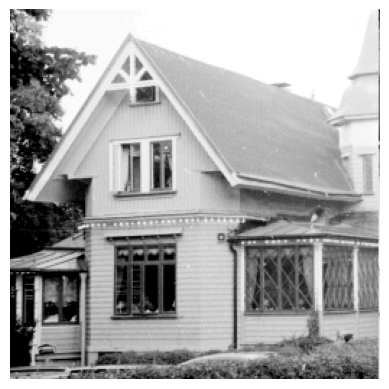

(256, 256) (256, 256) (256, 256)


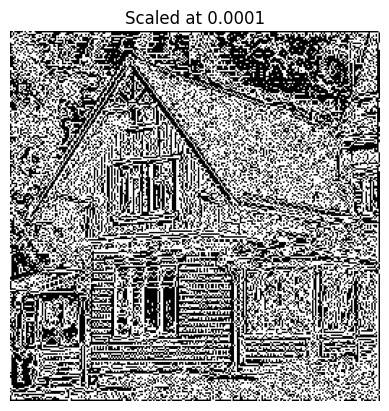

(256, 256) (256, 256) (256, 256)


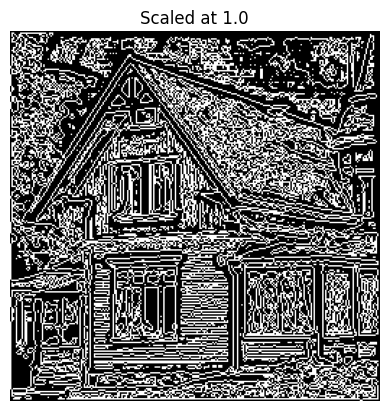

(256, 256) (256, 256) (256, 256)


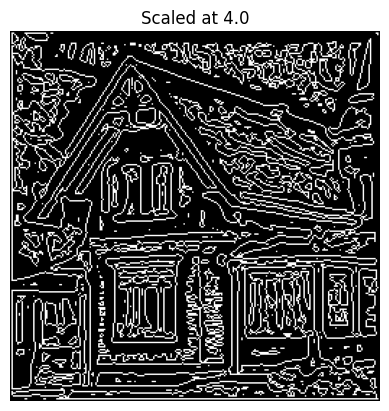

(256, 256) (256, 256) (256, 256)


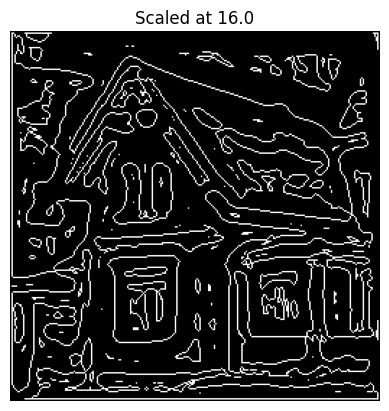

(256, 256) (256, 256) (256, 256)


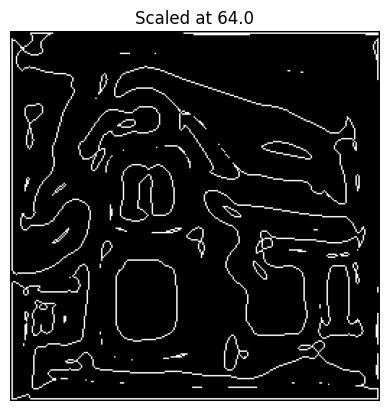

In [13]:
# Define the central difference operators
# Compute the first order derivatives
dxmask = np.array([[0, 0, 0],
                  [1/2, 0, -1/2],
                  [0, 0, 0]])

dymask = dxmask.transpose()

# Compute the second order derivatives
dxxmask = np.array([[0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [0, 1, -2, 1, 0],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0]])

dyymask = dxxmask.transpose()

# Compute the third order derivatives
dxxxmask = convolve2d(dxmask, dxxmask, 'same')
dyyymask = convolve2d(dymask, dyymask, 'same')

dxymask = convolve2d(dxmask, dymask, 'same')
dxxymask = convolve2d(dxxmask, dymask, 'same')
dxyymask = convolve2d(dxmask, dyymask, 'same')

def Lvvtilde(inpic, shape = 'same'):
    Lx = convolve2d(inpic, dxmask, shape)
    Ly = convolve2d(inpic, dymask, shape)
    Lxx =  convolve2d(inpic, dxxmask, shape)
    Lyy =  convolve2d(inpic, dyymask, shape)
    Lxy =  convolve2d(inpic, dxymask, shape)
    output = (Lx**2 * Lxx) + (2 * Lx * Ly * Lxy) + (Ly**2 * Lyy)
    return output

# Load the image
house = np.load("Images-npy/godthem256.npy")
showgrey(house)
                          
scales = [0.0001, 1.0, 4.0, 16.0, 64.0]

# Display images
for scale in scales:
    plt.title(f'Scaled at {scale}')
    showgrey(contour(Lvvtilde(discgaussfft(house, scale ), 'same')))

**Question 4**<br>
What can you observe? Provide explanation based on the generated images.

**Answer** <br>
The scale determines the blurring of the image using the Gaussian filter. The larger the scale, the more the image is blurred. For lower scales less than 4, more noisy edges are visible, including the contours on the roof and the wooden panels making the house. At scale of 16, only the stronger edges are visible which include the general outline of the house. At a scale of 64, only the distorted edges of the house can be seen. Most of the edges within the image are reduced in this scale.

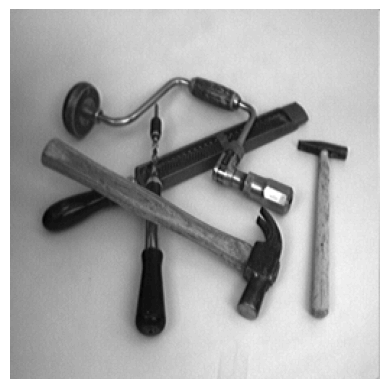

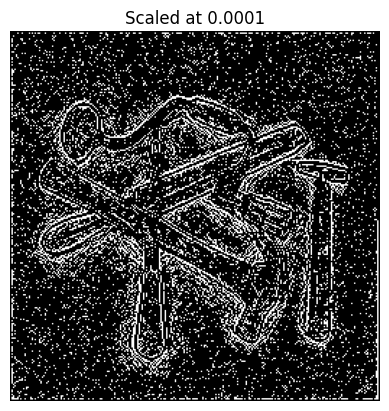

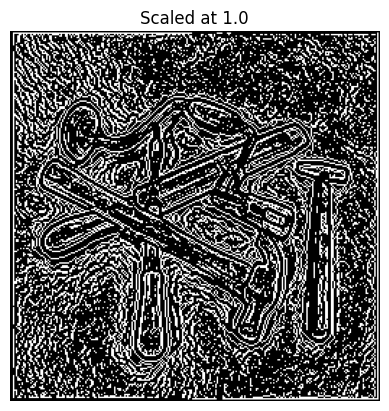

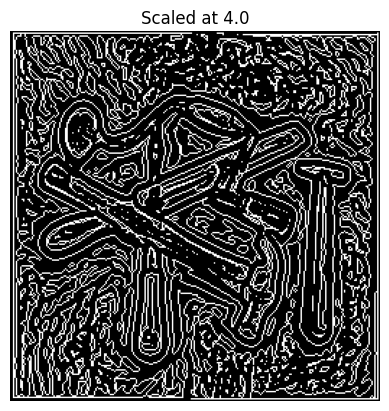

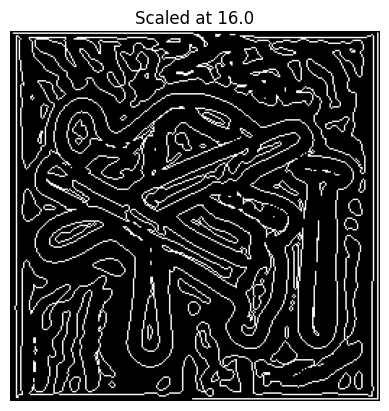

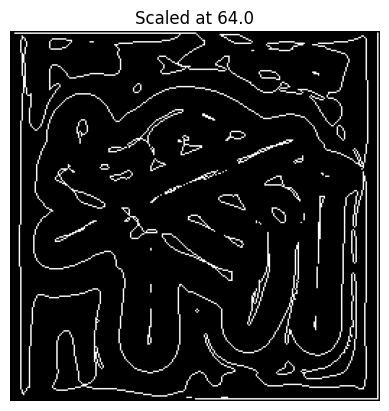

In [84]:
# Define the central difference operators
# Compute the first order derivatives
dxmask = np.array([[0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 1/2, 0, -1/2, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],])

dymask = dxmask.transpose()

# Compute the second order derivatives
dxxmask = np.array([[0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [0, 1, -2, 1, 0],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0]])

dyymask = dxxmask.transpose()

# Compute the third order derivatives
dxxxmask = convolve2d(dxmask, dxxmask, 'same')
dyyymask = convolve2d(dymask, dyymask, 'same')

dxymask = convolve2d(dxmask, dymask, 'same')
dxxymask = convolve2d(dxxmask, dymask, 'same')
dxyymask = convolve2d(dxmask, dyymask, 'same')

def Lvvvtilde(inpic, shape = 'same'):
    Lx = convolve2d(inpic, dxmask, shape)
    Ly = convolve2d(inpic, dymask, shape)
    Lxxx =  convolve2d(inpic, dxxxmask, shape)
    Lyyy =  convolve2d(inpic, dyyymask, shape)
    Lxxy =  convolve2d(inpic, dxxymask, shape)
    Lxyy =  convolve2d(inpic, dxyymask, shape)
    output = ((Lx**3) * Lxxx) + (3 * (Lx**2) * Ly * Lxxy) + (3 * Lx * (Ly**2) * Lxyy) + ((Ly**3) * Lyyy)
    return output

# Load the image
tools = np.load("Images-npy/few256.npy")
showgrey(tools)
                          
scales = [0.0001, 1.0, 4.0, 16.0, 64.0]

# Display images
for scale in scales:
    plt.title(f'Scaled at {scale}')
    showgrey(contour(Lvvvtilde(gaussfft(tools, scale ), 'same')<0).astype(int))

**Question 5** <br>
Assemble the results of the experiment above into an illustrative collage with the subplot command. Which are your observations and conclusions?

**Answer** <br>
$\tilde{L}_{vvv}$ allows only the points corresponding to the local maxima to get passed. For lower scales, more details are visible but these dimish as the scale increases.

**Question 6** <br>
How can you use the response from $\tilde{L}_{vv}$ to detect edges, and how can you improve the result by using $\tilde{L}_{vvv}$?

**Answer** <br>
$\tilde{L}_{vv}$ give us all the zero-crossings which coincide with the turning points (maxima and minima) of the image. $\tilde{L}_{vvv}$ allow us to only consider the values of the maxima for the edge detection increasing the accuracy of the detector.

## Extraction of Edge Segments

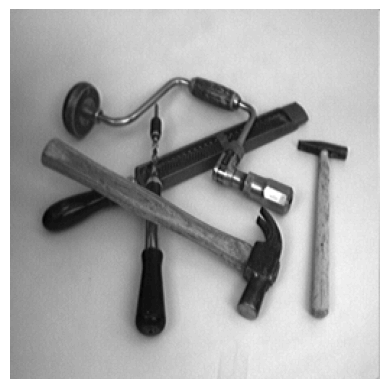

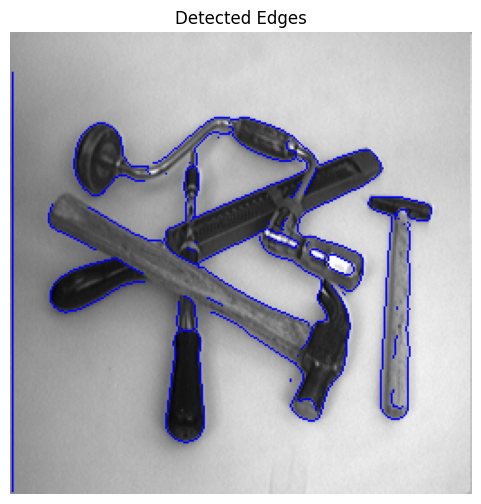

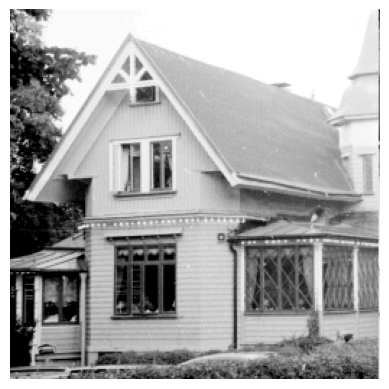

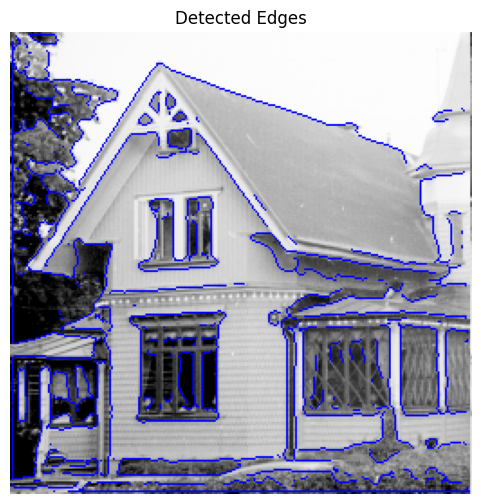

In [94]:
def Lv(inpic, shape = 'same'):
    inpic = np.real(gaussfft(inpic, 1))
    Lx = convolve2d(inpic, dxmask, shape)
    Ly = convolve2d(inpic, dymask, shape)
    return np.sqrt(Lx**2 + Ly**2)

def Lvvtilde(inpic, shape = 'same'):
    Lx = convolve2d(inpic, dxmask, shape)
    Ly = convolve2d(inpic, dymask, shape)
    Lxx =  convolve2d(inpic, dxxmask, shape)
    Lyy =  convolve2d(inpic, dyymask, shape)
    Lxy =  convolve2d(inpic, dxymask, shape)
    output = (Lx**2 * Lxx) + (2 * Lx * Ly * Lxy) + (Ly**2 * Lyy)
    return output

def Lvvvtilde(inpic, shape = 'same'):
    Lx = convolve2d(inpic, dxmask, shape)
    Ly = convolve2d(inpic, dymask, shape)
    Lxxx =  convolve2d(inpic, dxxxmask, shape)
    Lyyy =  convolve2d(inpic, dyyymask, shape)
    Lxxy =  convolve2d(inpic, dxxymask, shape)
    Lxyy =  convolve2d(inpic, dxyymask, shape)
    output = (Lx**3 * Lxxx) + (3 * Lx**2 * Ly * Lxxy) + (3 * Lx * Ly**2 * Lxyy) + (Ly**3 * Lyyy)
    return output

def extractedge(inpic, scale, threshold = 0.0, shape = 'same'):
    gaussianinpic = gaussfft(inpic, scale)
    grad = Lv(gaussianinpic, shape)

    # Compute the second order derivatives
    Lvv = Lvvtilde(gaussianinpic, shape)
    # Compute the third order derivatives
    Lvvv = Lvvvtilde(gaussianinpic, shape)

    # Compute the zero-crossings which are edges
    curves = zerocrosscurves(Lvv, Lvvv < 0)
    # Return the edges above the threshold
    edges = thresholdcurves(curves, grad > threshold)
    
    return edges

tools = np.load("Images-npy/few256.npy")
showgrey(tools)
tooledges = extractedge(tools, 4.0, 6.5)

# Display the edges
plt.figure(figsize=(6, 6))
overlaycurves(tools, tooledges)
plt.title('Detected Edges')
plt.axis('off')
plt.show()

godthem = np.load("Images-npy/godthem256.npy")
showgrey(godthem)
godthemedges = extractedge(godthem, 4.0, 6.5)

# Display the edges
plt.figure(figsize=(6, 6))
overlaycurves(godthem, godthemedges)
plt.title('Detected Edges')
plt.axis('off')
plt.show()

**Question 7** <br> 
Present your best results obtained with extractedge() for house and tools.

**Answer** <br>
For the tools image, the best result was obtained for scale = 4.0 and threshold = 6.5. <br>
For the house image, the best result was obtained for scale = 4.0 and threshold = 6.5.

## Hough Transform

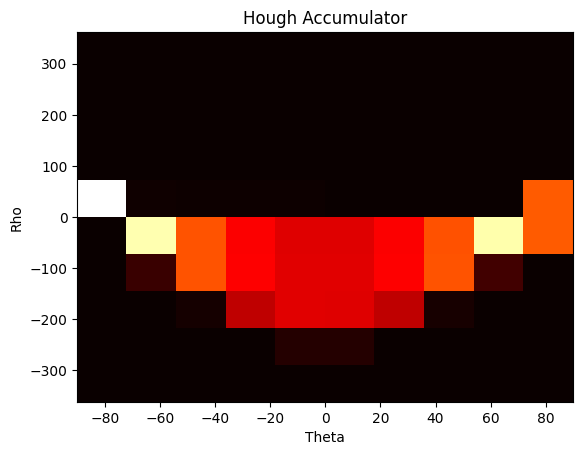

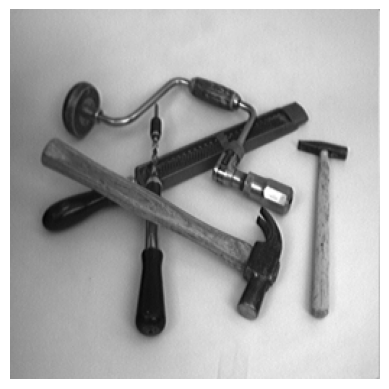

In [103]:
def polar_to_cartesian(rho, theta, image_shape):
    y, x = np.indices((image_shape[0], image_shape[1]))
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    is_vertical = np.abs(sin_theta) > np.abs(cos_theta)

    x_line = (rho - y * sin_theta) / (cos_theta + 1e-10)  # Avoid division by zero
    y_line = (rho - x * cos_theta) / (sin_theta + 1e-10)  # Avoid division by zero

    valid_x = (x_line >= 0) & (x_line < image_shape[1])
    valid_y = (y_line >= 0) & (y_line < image_shape[0])

    y, x = np.where((is_vertical & valid_y) | (~is_vertical & valid_x))
    return y, x

def houghline(curves, magnitude, nrho, ntheta, threshold, nlines, verbose = False):
    """ 
    • linepar is a list of (ρ, θ) parameters for each line segment,
    • acc is the accumulator matrix of the Hough transform,
    • curves are the edge points from which the transform is to be computed,
    • magnitude is an image with one intensity value per pixel 
      (in exercise 6.2 you will here give the gradient magnitude as an argument),
    • nrho is the number of accumulators in the ρ direction,
    • ntheta is the number of accumulators in the θ direction,
    • threshold is the lowest value allowed for the given magnitude,
    • nlines is the number of lines to be extracted,
    • verbose denotes the degree of extra information and figures that will be shown.
    """    
    # Initialize the Hough accumulator array
    acc = np.zeros((nrho, ntheta))
    
    # Define the Hough space range
    diag_len = int(np.sqrt(magnitude.shape[0]**2 + magnitude.shape[1]**2))
    d_rho = 2 * diag_len / (nrho - 1)
    thetas = np.deg2rad(np.linspace(-90, 90, ntheta))
    
    # Find coordinates of edge points
    y_indices, x_indices = np.nonzero(curves)
    
    # Populate the Hough accumulator
    for y, x in zip(y_indices, x_indices):
        if 0 <= y < magnitude.shape[0] and 0 <= x < magnitude.shape[1]:
            for theta_idx, theta in enumerate(thetas):
                rho = x * np.cos(theta) + y * np.sin(theta)
                rho_idx = int(round((rho + diag_len) / d_rho))
                if rho_idx < nrho:
                    acc[rho_idx, theta_idx] += 1

    # Find the most prominent lines
    pos, value, anms = locmax8(acc)
    line_indices = np.argsort(value)[-nlines:]
    linepar = [(pos[idx][0] * d_rho - diag_len, thetas[pos[idx][1]]) for idx in line_indices]

    # Convert line parameters to pixel coordinates
    line_pixels = []
    for rho, theta in linepar:
        y, x = polar_to_cartesian(rho, theta, magnitude.shape)
        line_pixels.append((y, x))
    
    # Optionally, display the accumulator and the lines
    if verbose:
        plt.imshow(acc, cmap='hot', extent=[-90, 90, -diag_len, diag_len], aspect='auto')
        plt.title('Hough Accumulator')
        plt.xlabel('Theta')
        plt.ylabel('Rho')
        plt.show()
        for line in line_pixels:
            overlaycurves(magnitude, line)

    return linepar, acc
    
tools = np.load("Images-npy/few256.npy")
tooledges = extractedge(tools, 4.0, 6.5)
[ linepar, acc ] = houghline(tooledges, tools, 10, 10, threshold, 10, True)